In [ ]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Analisando a BD para realizar possíveis limpezas

In [ ]:
test = "test.csv"
train = "train.csv"

test_df = pd.read_csv(test)
df = pd.read_csv(train)
test_check = pd.read_csv("gender_submission.csv")

df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Descrição de cada coluna:
*   PassengerID - Id do passageiro
*   Survived - Se sobreviveu (0 = não, 1 = sim)
*   Pclasse - Classe do Passageiro (1 = 1ª; 2 = 2ª; 3 = 3ª)
*   Name - Nome
*   Sex - Gênero
*   Age - Idade
*   SibSp - Número de Irmãos/Cônjuges a Bordo
*   Parch - Número de Pais/Filhos a Bordo
*   Ticket - Número do Bilhete
*   Fare - Tarifa do Passageiro
*   Cabin - Cabine
*   Embarked - Porto de Embarque (C = Cherbourg; Q = Queenstown; S = Southampton)

Já se pode ver pelas primeiras 10 linhas que a coluna Cabin tem diversas entradas como NaN. E podemos analisar isso melhor vendo a quantidade de informações não nulas.

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Podemos observar que a coluna Cabin tem apenas 204 de suas 891 linhas não nulas, ou seja, 684 linhas são nulas. Já que essa coluna está extremamente incompleta podemos descartar ela de nossa anlalise juntamente com a coluna Ticket já que ela simplesmente representa um número gerado aleatoriamente para diferenciar a passagem de cada passageiro.

In [ ]:
column_drop = ['Cabin', 'Ticket']
df.drop(column_drop, axis=1, inplace = True)

## Analisando o mapa de calor das informações:

Transformando as informações em int ou float

In [ ]:
df["Sex"] = df["Sex"].replace({"male": 0, "female": 1})

df["is_S"] = df["Embarked"].apply(lambda x: 1 if x == "S" else 0)
df["is_C"] = df["Embarked"].apply(lambda x: 1 if x == "C" else 0)
df["is_Q"] = df["Embarked"].apply(lambda x: 1 if x == "Q" else 0)

df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,is_S,is_C,is_Q
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,1,0,0
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,8.4583,Q,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,51.8625,S,1,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,21.0750,S,1,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,11.1333,S,1,0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,30.0708,C,0,1,0


<ipython-input-9-e61eca7ad662>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_heatmap = df[{"Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "is_S", "is_C", "is_Q"}]


<Axes: >

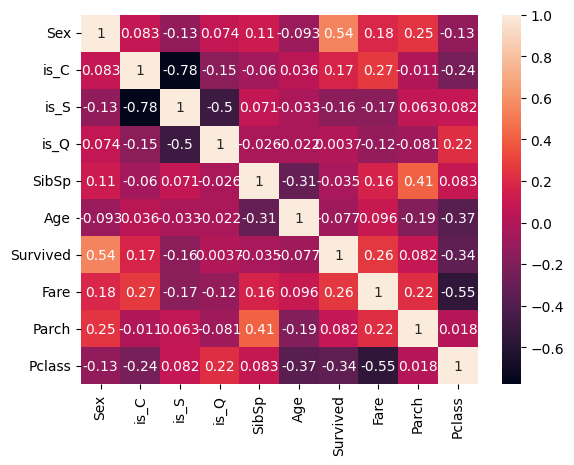

In [ ]:
df_heatmap = df[{"Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "is_S", "is_C", "is_Q"}]

corr = df_heatmap.corr()
plt.figure()
sns.heatmap(data=corr, annot=True)

Percebe-se que a correlação entre sobrevivência e idade está muito baixa, o que não faz sentido logicamente, já que em um acidente os mais novos são priorizados. Nesse sentido, faz-se necessário verificar novamente a coluna "Age".

In [ ]:
df_heatmap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    int64  
 1   is_C      891 non-null    int64  
 2   is_S      891 non-null    int64  
 3   is_Q      891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Age       714 non-null    float64
 6   Survived  891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Parch     891 non-null    int64  
 9   Pclass    891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


Com isso, é possível observar que das 890 linhas, há 177 valores que são nulos ou "Not a number". Sendo assim, é necessário primeiramente deduzir esses valores.

In [ ]:
df["Name"].info(); df["Name"].head()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Name
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

Acima, é notável que no campo de nome, está incluido o título da pessoa. Para extrair:

In [ ]:
df_heatmap["Title"] = df["Name"].str.extract(' ([A-Za-z]+)\.')
df_heatmap.head()

<ipython-input-12-07f62218307e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heatmap["Title"] = df["Name"].str.extract(' ([A-Za-z]+)\.')


,Sex,is_C,is_S,is_Q,SibSp,Age,Survived,Fare,Parch,Pclass,Title
0,0,0,1,0,1,22.0,0,7.2500,0,3,Mr
1,1,1,0,0,1,38.0,1,71.2833,0,1,Mrs
2,1,0,1,0,0,26.0,1,7.9250,0,3,Miss
3,1,0,1,0,1,35.0,1,53.1000,0,1,Mrs
4,0,0,1,0,0,35.0,0,8.0500,0,3,Mr


Utilizando os títulos como base é possível definir uma estimativa para as idades que poderia contornar os valores dados como NaN na coluna "age". Para isso, vamos definir os nossos "chutes" para cada título.

In [ ]:
contagem_title = df_heatmap['Title'].value_counts()
print(contagem_title)

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64


Nessa situação, para simplificar, só precisamos saber se a pessoa é jovem ou não, já que está diretamente relacionada a chance de sobrevivência. Sendo assim, para todos os títulos que não forem "Miss" e "Master" nós podemos assumir uma idade média de adulto, como 30. E para esses 2 títulos assumimos um valor médio de jovem/adolescente/criança, nesse caso é justo assumir 12, por exemplo.

> **Observação:** Apesar da tradução literal de "Master" apontar para "Mestre", o mestre nesse contexto é utilizado com outro significado, deixando de lado o título acadêmico e se tratando de uma referência para crianças e adolescentes do sexo masculino. É possível perceber isso pelo próprio banco de dados, já que em todos os casos que essa palavra foi usada não se tratava de um adulto.



In [ ]:
def fill_age(row):
    if pd.isnull(row['Age']):
        if row['Title'] in ['Master', 'Miss']:
            return 12
        else:
            return 30
    else:
        return row['Age']

df_heatmap['Age'] = df_heatmap.apply(fill_age, axis=1)

print(df_heatmap)
print(df_heatmap.info())

     Sex  is_C  is_S  is_Q  SibSp   Age  Survived     Fare  Parch  Pclass  \
0      0     0     1     0      1  22.0         0   7.2500      0       3   
1      1     1     0     0      1  38.0         1  71.2833      0       1   
2      1     0     1     0      0  26.0         1   7.9250      0       3   
3      1     0     1     0      1  35.0         1  53.1000      0       1   
4      0     0     1     0      0  35.0         0   8.0500      0       3   
..   ...   ...   ...   ...    ...   ...       ...      ...    ...     ...   
886    0     0     1     0      0  27.0         0  13.0000      0       2   
887    1     0     1     0      0  19.0         1  30.0000      0       1   
888    1     0     1     0      1  12.0         0  23.4500      2       3   
889    0     1     0     0      0  26.0         1  30.0000      0       1   
890    0     0     0     1      0  32.0         0   7.7500      0       3   

    Title  
0      Mr  
1     Mrs  
2    Miss  
3     Mrs  
4      Mr  
.. 

<ipython-input-14-8342be1bb9e9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heatmap['Age'] = df_heatmap.apply(fill_age, axis=1)


Dessa maneira, todas as idades que estavam nulas agora estão preenchidas com algum valor, para prejudicar o mínimo possível a predição.

<ipython-input-15-4e74d51e5b4a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_heatmap.corr()


<Axes: >

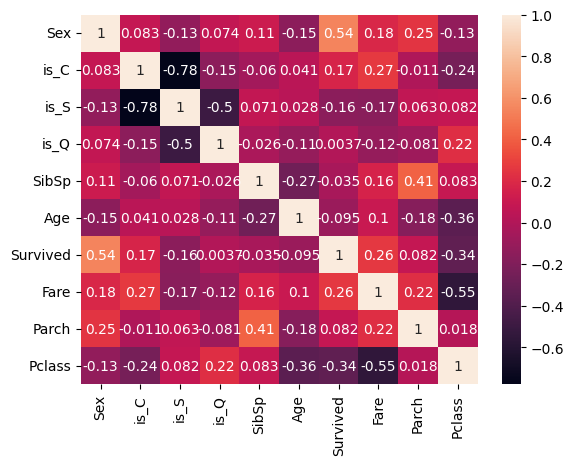

In [ ]:
corr = df_heatmap.corr()
plt.figure()
sns.heatmap(data=corr, annot=True)

Agora nós temos todos as idades com valores não nulos

Agora podemos montar e treinar o modelo.

In [ ]:
train_df = df_heatmap.drop("Title", axis=1)
train_df = train_df.sort_index(axis=1)

y = train_df['Survived']
X = train_df.drop("Survived", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

model_rf = RandomForestClassifier(random_state=20)

model_rf.fit(X_train, y_train)

previsoes_rf = model_rf.predict(X_test)

precision_rf = accuracy_score(y_test, previsoes_rf)
print(f'A precisão do modelo é de {precision_rf * 100:.2f}%')
train_df.head()

A precisão do modelo é de 82.12%


,Age,Fare,Parch,Pclass,Sex,SibSp,Survived,is_C,is_Q,is_S
0,22.0,7.2500,0,3,0,1,0,0,0,1
1,38.0,71.2833,0,1,1,1,1,1,0,0
2,26.0,7.9250,0,3,1,0,1,0,0,1
3,35.0,53.1000,0,1,1,1,1,0,0,1
4,35.0,8.0500,0,3,0,0,0,0,0,1


Utilizando-o no dataset de teste:

In [ ]:
df = test_df

columns_drop = ["Title", "Cabin", "PassengerId", "Name", "Embarked", "Ticket", ]

#realizando todas as tranformações.

df["Sex"] = df["Sex"].replace({"male": 0, "female": 1})

df["is_S"] = df["Embarked"].apply(lambda x: 1 if x == "S" else 0)
df["is_C"] = df["Embarked"].apply(lambda x: 1 if x == "C" else 0)
df["is_Q"] = df["Embarked"].apply(lambda x: 1 if x == "Q" else 0)

df["Title"] = df["Name"].str.extract(' ([A-Za-z]+)\.')
df['Age'] = df_heatmap.apply(fill_age, axis=1)

df = df.drop(columns_drop, axis=1)
df = df.sort_index(axis=1)
df.head()

,Age,Fare,Parch,Pclass,Sex,SibSp,is_C,is_Q,is_S
0,22.0,7.8292,0,3,0,0,0,1,0
1,38.0,7.0000,0,3,1,1,0,0,1
2,26.0,9.6875,0,2,0,0,0,1,0
3,35.0,8.6625,0,3,0,0,0,0,1
4,35.0,12.2875,1,3,1,1,0,0,1


> **Observação** Há 1 valor em Fare que é dado por NaN, como não influenciará tanto no resultado (basta ver o heatmap) é possível dropar esse valor ou transformá-lo na média

In [ ]:
df["Fare"].mean()  #35.6

df["Fare"] = df["Fare"].map(lambda x: 35.6 if pd.isnull(x) else x)

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     418 non-null    float64
 1   Fare    418 non-null    float64
 2   Parch   418 non-null    int64  
 3   Pclass  418 non-null    int64  
 4   Sex     418 non-null    int64  
 5   SibSp   418 non-null    int64  
 6   is_C    418 non-null    int64  
 7   is_Q    418 non-null    int64  
 8   is_S    418 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


# Testando o modelo no dataset de treino:

In [ ]:
df["Survived"] = model_rf.predict(df)

print(df.head())
print(test_check.head())

    Age     Fare  Parch  Pclass  Sex  SibSp  is_C  is_Q  is_S  Survived
0  22.0   7.8292      0       3    0      0     0     1     0         0
1  38.0   7.0000      0       3    1      1     0     0     1         0
2  26.0   9.6875      0       2    0      0     0     1     0         0
3  35.0   8.6625      0       3    0      0     0     0     1         0
4  35.0  12.2875      1       3    1      1     0     0     1         0
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [ ]:
previsão = df["Survived"]

accuracy = accuracy_score(test_check["Survived"], previsão)

print(f'A precisão do modelo no conjunto de teste é de {accuracy * 100:.2f}%')

A precisão do modelo no conjunto de teste é de 78.23%


Assim, o modelo alcançou uma acurácia de 78% no conjunto de dados final. Embora isso represente um desempenho satisfatório, ainda há margem para melhorias.